<a href="https://colab.research.google.com/github/danysc/DA-Projects/blob/main/Human_Resources_Data_Set_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REF   
302 - HR Practice-Dan-S-Fix-4B

Human Resources Data Set  :
https://www.kaggle.com/rhuebner/human-resources-data-set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from collections import Counter

In [ ]:
pd.set_option("display.precision", 1)

Read the data from Github:

In [ ]:
# Read the csv from my GitHub
df = pd.read_csv('https://raw.githubusercontent.com/danysc/DA-Projects/main/HRDataset_v14.csv')
columnNames = list(df)
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.6,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,5.0,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.0,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.8,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.0,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.0,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.0,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.0,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.5,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.0,5,6,2/18/2019,0,16


In [ ]:
print(df.shape)

(311, 36)


In [ ]:
# List of the columns:
columnNames = list(df)
columnNames

['Employee_Name',
 'EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'Salary',
 'Termd',
 'PositionID',
 'Position',
 'State',
 'Zip',
 'DOB',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'HispanicLatino',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'Department',
 'ManagerName',
 'ManagerID',
 'RecruitmentSource',
 'PerformanceScore',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'LastPerformanceReview_Date',
 'DaysLateLast30',
 'Absences']

In [ ]:
df['Salary'].isnull().sum()

0

In [ ]:
# Set the precision of the results:
pd.set_option("display.precision", 1)

In [ ]:
# Salary statistics
df['Salary'].describe()

count       311.0
mean      69020.7
std       25156.6
min       45046.0
25%       55501.5
50%       62810.0
75%       72036.0
max      250000.0
Name: Salary, dtype: float64

Is the married change the salary?

In [ ]:
df.groupby(['MarriedID'])\
.agg(Salary_mean = ('Salary','mean'))\
  .sort_values('Salary_mean', ascending = False)\
  .head(7)

,Salary_mean
MarriedID,
1,69827.7
0,68485.5


#  Using the library scikit-learn.

Linear Regression in 6 lines of Python: 

https://www.youtube.com/watch?v=kR6tBAq16ng&t=108s

In [ ]:
## If you don’t have it already you can install it using pip:
# pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# New DF for Linear Regression:
data =df[['Salary','EngagementSurvey']]
data.head()

,Salary,EngagementSurvey
0,62506,4.6
1,104437,5.0
2,64955,3.0
3,64991,4.8
4,50825,5.0


In [ ]:
df_x = data.iloc[:, 0].values.reshape(-1, 1)    # values converts it into a numpy array
df_y = data.iloc[:, 1].values.reshape(-1, 1)    # -1 means that calculate the dimension of rows, but have 1 column


In [ ]:
linear_regressor = LinearRegression()     # create object for the class
linear_regressor.fit(df_x, df_y)          # perform linear regression
Y_pred = linear_regressor.predict(df_x)     # make predictions

**Predictions in Y_pred. Visualize the data set and the regression line:**

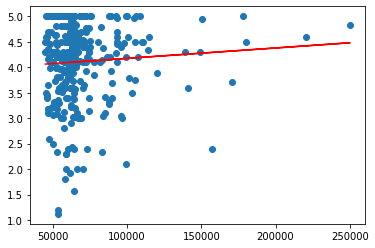

In [ ]:
plt.scatter(df_x, df_y)
plt.plot(df_x, Y_pred, color='red')
plt.show()